In [1]:
import matplotlib.pyplot as plt
import pandas as pd


data = pd.read_excel(r'Measurements/Underground-Mine/202305-NAMICO-UM-Milesight.xlsx')

data = data.replace({'-':float('nan')})

colors = ['#1F77B4', '#BA0A24', '#000000', '#22B14C', '#FFC90E', '#FF7F27', '#FF80A9', '#A349A4', '#B97A57']

#print(data)


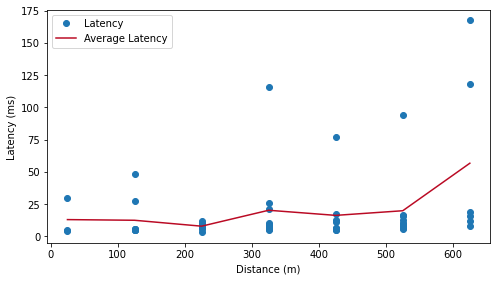

In [2]:
distance = data['Distance (m)']
latency = data[' AvgLat']

fig, ax1 = plt.subplots(figsize=(7, 4))

ax1.plot(distance, latency, marker='o', color=colors[0], linestyle='None', label="Latency")
ax1.set_xlabel('Distance (m)')
ax1.set_ylabel('Latency (ms)')

#ax1.legend(['Latency'], loc='upper left', bbox_to_anchor=(0, 1.15))

fig.tight_layout()
fig.savefig('Graphics/Underground-Mine/Milesight/o-milesight-lat--distance.pdf', format='pdf')

#plt.show()

#-------

df_mean = data.groupby('Distance (m)').mean()

distance_m = df_mean.index
latency_m = df_mean[' AvgLat']

#fig, ax1 = plt.subplots()

ax1.plot(distance_m, latency_m, color=colors[1], linestyle='-', label="Average Latency")
#ax1.set_xlabel('Distance (m)')
#ax1.set_ylabel('Latency (ms)')

#ax1.legend(['Latency'], loc='upper left', bbox_to_anchor=(0, 1.15))

ax1.legend()
ax1.legend(loc='upper left')#, bbox_to_anchor=(1.0, 1.0))

fig.tight_layout()
fig.savefig(r'Graphics/Underground-Mine/Milesight/ol-milesight-lat--distance.pdf', format='pdf')


plt.show()

#print(latency_m)

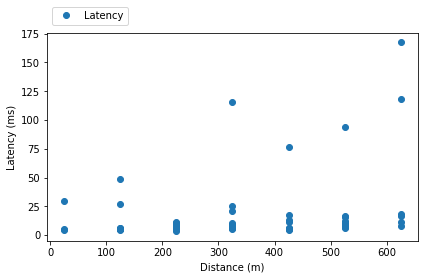

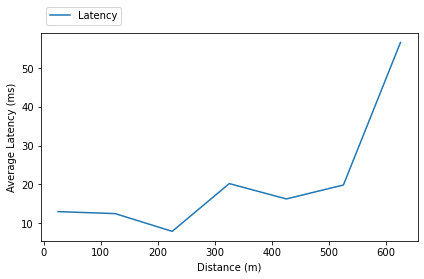

In [3]:
distance = data['Distance (m)']
latency = data[' AvgLat']

fig, ax1 = plt.subplots()

ax1.plot(distance, latency, marker='o', color='#1F77B4', linestyle='None')
ax1.set_xlabel('Distance (m)')
ax1.set_ylabel('Latency (ms)')

ax1.legend(['Latency'], loc='upper left', bbox_to_anchor=(0, 1.15))

fig.tight_layout()
fig.savefig(r'Graphics/Underground-Mine/Milesight/o-milesight-lat--distance.pdf', format='pdf')

plt.show()

#-------

df_mean = data.groupby('Distance (m)').mean()

distance_m = df_mean.index
latency_m = df_mean[' AvgLat']

fig, ax1 = plt.subplots()

ax1.plot(distance_m, latency_m, color='#1F77B4', linestyle='-')
ax1.set_xlabel('Distance (m)')
ax1.set_ylabel('Average Latency (ms)')

ax1.legend(['Latency'], loc='upper left', bbox_to_anchor=(0, 1.15))

fig.tight_layout()
fig.savefig(r'Graphics/Underground-Mine/Milesight/milesight-lat--distance.pdf', format='pdf')

plt.show()

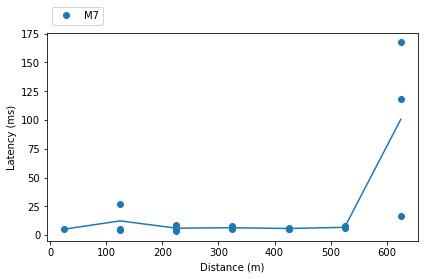

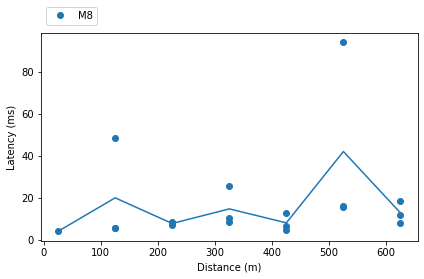

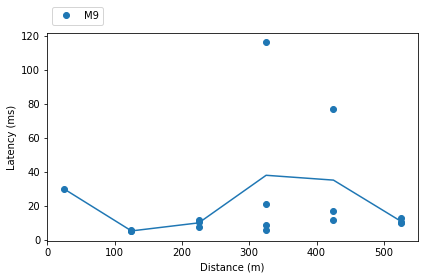

In [4]:
filtered_data = pd.DataFrame()
measurement_data = pd.DataFrame() 

for i in range(7, 10):
    for j in range(1, 10):
        
        measurement = f"M{j}{i}"

        filtered_data = filtered_data.append(data[data['Measurement'].str.contains(measurement)])
        #print("here ", filtered_data)

        distance_f = filtered_data['Distance (m)']
        avg_latency_f = filtered_data[' AvgLat']
        
        if j == 9:
            
            label_legend = "M" + str(i)
            
            fig, ax = plt.subplots()
            
            ax.plot(distance_f, avg_latency_f, marker='o', color='#1F77B4', linestyle='None')
            ax.set_xlabel('Distance (m)')
            ax.set_ylabel('Latency (ms)')
            #ax.set_title('Average Latency for M' + str(i) + ' Measurements')
            #ax.legend([label_legend], loc='upper left', bbox_to_anchor=(0, 1.15))
            
            #plt.show()
            
            
            df_mean = filtered_data.groupby('Distance (m)').mean()

            distance_m = df_mean.index
            latency_m = df_mean[' AvgLat']

            #fig1, ax1 = plt.subplots()

            ax.plot(distance_m, latency_m, color='#1F77B4', linestyle='-')
            #ax1.set_xlabel('Distance (m)')
            #ax1.set_ylabel('Average Latency (ms)')

            ax.legend([label_legend], loc='upper left', bbox_to_anchor=(0, 1.15))

            #fig1.tight_layout()
            #fig1.savefig('milesight-M'+ str(i) +'-lat--distance.pdf', format='pdf')
            
            fig.tight_layout()
            fig.savefig(r'Graphics/Underground-Mine/Milesight/ol-milesight-M'+ str(i) +'-lat--distance.pdf', format='pdf')          

            #print("filtro : ", filtered_data)
            filtered_data = pd.DataFrame()
            
            plt.show()


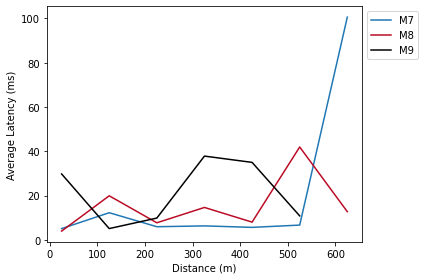

In [5]:
fig, ax = plt.subplots()

for i in range(7, 10):
    filtered_data = pd.DataFrame() 

    for j in range(1, 11):
        
        measurement = f"M{j}{i}"

        filtered_data = filtered_data.append(data[data['Measurement'].str.contains(measurement)])

    df_mean = filtered_data.groupby('Distance (m)').mean()
    distance_m = df_mean.index
    latency_m = df_mean[' AvgLat']

    ax.plot(distance_m, latency_m, linestyle='-', label='M' + str(i), color=colors[i-7])

#print("filtro : ", filtered_data)

ax.set_xlabel('Distance (m)')
ax.set_ylabel('Average Latency (ms)')
#ax.set_title('Average Latency for Measurements')

ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
          
fig.tight_layout()
fig.savefig(r'Graphics/Underground-Mine/Milesight/milesight-mult-lat--distance.pdf', format='pdf')

plt.show()